# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

# <h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df = pd.read_csv('data/human_body_temperature.csv')
print(df[:5])

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


# Your work here.
#Is the distribution of body temperatures normal?

According to CLT :- suppose that a sample is obtained containing a large number of observations, 
each observation being randomly generated in a way that does not depend on the values of the other observations(Independence), 
and the mean of the observed values is computed. If this procedure is performed many times,
the central limit theorem says that the distribution of the average will be closely approximated by a normal distribution.
So here our sample is large and also a representative of population, so acc to CLT distribution of body temeratures is normal.

# Another way to Test Normality

QQ Plot :- 
A graphical tool for assessing normality is the quantile-quantile plot (QQ plot) of the standardized data against the standard normal distribution. Here the correlation between the sample data and normal quantiles is a measure of the goodness of fit measures how well the data are modeled by a normal distribution. For normal data the points plotted in the QQ plot should fall approximately on a straight line, indicating high positive correlation. These plots are easy to interpret and also have the benefit that outliers are easily identified.


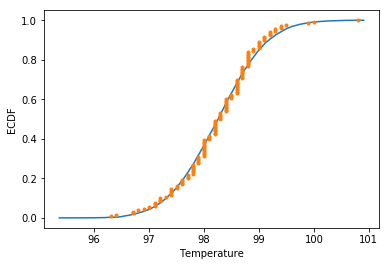

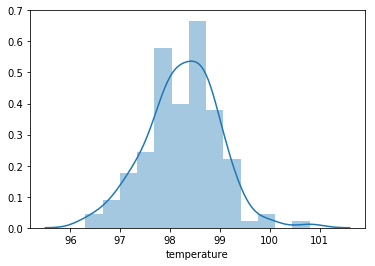

In [25]:
## Check cdf and ecdf of samples with normal ditribution:- 
from statsmodels.distributions.empirical_distribution import ECDF
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys
data = df['temperature']
mu = np.mean(data)
sigma = np.std(data)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor,y_theor = ecdf(samples)
x,y= ecdf(data)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')
plt.show()
ax = sns.distplot(df['temperature'])

Above is the ECDF plot to check the condition of Normality,we can see here ecdf of data and ecdf of normal distribution lies on each other, therefore data follows Normal Distribution.

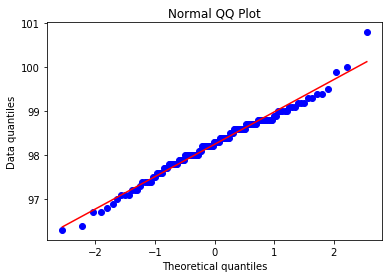

In [8]:
# QQPlot:- Equivalent to Probability plot
import numpy as np
import pylab
import matplotlib.pyplot as plt
import scipy.stats as stats

data = df['temperature']
stats.probplot(data,dist = 'norm', plot = pylab)
plt.title("Normal QQ Plot")
plt.ylabel("Data quantiles")
pylab.show()

Here from the above Graph we can see that data quantiles lies approximately on the straight line so the temperature data is normally distributed.

# Q2: -Is the sample size large? Are the observations independent?
Yes, The sample size of 130 observations is sufficiently large because our sample size is greater than 30, the Central Limit Theorem tells us that the sampling distribution will approximate a normal distribution.
# To check Independence:- 
We can use here 1% rule:- As from whole population only 130 observations are taken under consideration which is less that 10% of population then we can treat each observation as independent.
Also it's reasonable to assume independence considering each person is selected randomly and they shouldn't influence each other's results.

In [19]:
## Q3:- Is the true population mean really 98.6 degrees F?  # Bootstrap hypothesis testing
#Null Hypothesis - The true mean temperature = 98.6 F
#Alternative Hypothesis - The True mean temperature is not 98.6F(some different value than 98.6)
true_pop_mean = 98.6
data = df['temperature']
## Shifting the data to new temperature mean value
new_mean = 98.6
temp_shifted = data - np.mean(data) + new_mean

## The test Statistic for our testing is as follows
def diff_from_new(data1,new_mean = 98.6):
    return np.mean(data1) - new_mean

# Bootstrap Sample 
def bootstrap_replicate_1d(data,func):
    bs_sample = np.random.choice(data,len(data))
    return func(bs_sample)
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(temp_shifted,diff_from_new)
    
differnce_in_obs = diff_from_new(data,new_mean = 98.6)    
    
## Pvalue
p_value = np.sum(bs_replicates <= differnce_in_obs)/10000
print("P-value =",p_value)
    

P-value = 0.0


As p value = 0, it means we fail to reject null hypothesis at 95% significance interval So we can say that true mean temperature may be equal to 98.6.

## Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
 
## In this situation, is it appropriate to use the  t  or  z  statistic?
## Now try using the other test. How is the result be different? Why?

We will use here one sample test as we have only one sample of dataset with specific mean to test with.
we will use t test to test the hypothesis(to find any evidence of a significant difference between the population mean and a hypothesized value).

In [22]:
## T test
data = df['temperature']
from scipy import stats
ttest_result = stats.ttest_1samp(data,98.6)
print(ttest_result)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


The p value is very small than our Test Statistic, then with great evidence we can reject our null hypothesis of true mean equal to 98.6 and says that the statement of true mean temperature is different from 98.6 is statistically significant.
There is huge difference between two conclusions, with Bootstrap hypothesis testing we are concluding true mean temp. is equal to 98.6 but with t test testing we are concluding true mean temp. is different from 98.6.

## Q4:- Draw a small sample of size 10 from the data and repeat both frequentist tests.
## Which one is the correct one to use?
## What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

In [41]:
# generate random sample
sample = np.random.choice(df['temperature'], size=10)

In [42]:
ttest_result = stats.ttest_1samp(sample,98.6)
print(ttest_result)

Ttest_1sampResult(statistic=-3.8002282059560346, pvalue=0.004215887588869701)


In [43]:
from statsmodels.stats.weightstats import ztest
ztest_result = ztest(x1 = sample, value = 98.6)
print(ztest_result)

(-3.8002282059560346, 0.0001445628975552748)


The z-test was significant (p-val < 0.05) while the t-test was not. The z-test is appropiate to use 
here because we're pulling samplpe from a population (dataset) who's standard deviation is known.

## Q5 :- At what temperature should we consider someone's temperature to be "abnormal"?

In [44]:
# calculate 95% confidence interval
conf_int = stats.norm.interval(alpha=0.95, loc=np.mean(df['temperature']), scale=np.std(df['temperature']))

print('95% confidence interval:',conf_int)

95% confidence interval: (96.81775582674824, 99.68070571171332)


We will consider "abnormal" if the temperature is below 96.8 and above 99.68

## Q6 :- Is there a significant difference between males and females in normal temperature?
## What testing approach did you use and why?
## Write a story with your conclusion in the context of the original problem.

In [45]:
# get male and female temperature scores
male_temps = df[df['gender'] == 'M'].temperature
female_temps = df[df['gender'] == 'F'].temperature

WE will be using two Sample test because we want to know the difference between two quatiles and will use t-test here as we don't know the population Std deviation. 

Setting up the hypothesis:- 

Null - There is no difference between between Males and Females in normal Temperature.

Alternative :- There is difference between both gender's temperature

In [46]:
# conduct two-sample t-test (justification above)
from scipy.stats import ttest_ind
ttest_result= ttest_ind(male_temps, female_temps)

print(ttest_result)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)


The p value is less than significance level of 0.05,so we reject our null hypothesis and says that the difference between Males and Females in normal Temperature is statistically significant.

Analysis Conclusion:- 

1) All in all, it appears that the true normal body temperature varies from 98.6 F

2) And should only be considered "abnormal" if it varies outside the range of 96.81-99.68.

3) Finally, there's evidence in the data that there is a statistically significant difference between males and females in normal body temperatures.